In [2]:
import xml.etree.ElementTree as ET
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight") #ok

# Import XML in Python

In [5]:
# create element tree object
tree = ET.parse('data/export.xml') 
# for every health record, extract the attributes
root = tree.getroot()
record_list = [x.attrib for x in root.iter('Record')]

## Create Pandas DataFrame

In [6]:
record_data = pd.DataFrame(record_list)

In [7]:

# proper type to dates
for col in ['creationDate', 'startDate', 'endDate']:
    record_data[col] = pd.to_datetime(record_data[col])

# value is numeric, NaN if fails
record_data['value'] = pd.to_numeric(record_data['value'], errors='coerce')

# some records do not measure anything, just count occurences
# filling with 1.0 (= one time) makes it easier to aggregate
record_data['value'] = record_data['value'].fillna(1.0)

# shorter observation names
record_data['type'] = record_data['type'].str.replace('HKQuantityTypeIdentifier', '')
record_data['type'] = record_data['type'].str.replace('HKCategoryTypeIdentifier', '')
record_data.tail()

,type,sourceName,sourceVersion,unit,creationDate,startDate,endDate,value,device
1116421,HeartRateVariabilitySDNN,Krithi’s Apple Watch,10.3.1,ms,2024-04-05 20:23:35-04:00,2024-04-05 20:22:35-04:00,2024-04-05 20:23:33-04:00,34.3072,"<<HKDevice: 0x282ddc000>, name:Apple Watch, ma..."
1116422,HeartRateVariabilitySDNN,Krithi’s Apple Watch,10.3.1,ms,2024-04-05 22:24:30-04:00,2024-04-05 22:23:29-04:00,2024-04-05 22:24:28-04:00,72.7476,"<<HKDevice: 0x282ddc000>, name:Apple Watch, ma..."
1116423,HeartRateVariabilitySDNN,Krithi’s Apple Watch,10.3.1,ms,2024-04-06 11:43:59-04:00,2024-04-06 11:42:58-04:00,2024-04-06 11:43:58-04:00,48.4482,"<<HKDevice: 0x282ddc000>, name:Apple Watch, ma..."
1116424,HeartRateVariabilitySDNN,Krithi’s Apple Watch,10.3.1,ms,2024-04-06 13:15:01-04:00,2024-04-06 13:14:00-04:00,2024-04-06 13:15:00-04:00,65.7370,"<<HKDevice: 0x282ddc000>, name:Apple Watch, ma..."
1116425,HeartRateVariabilitySDNN,Krithi’s Apple Watch,10.3.1,ms,2024-04-06 15:56:21-04:00,2024-04-06 15:55:21-04:00,2024-04-06 15:56:20-04:00,34.5405,"<<HKDevice: 0x282ddc000>, name:Apple Watch, ma..."


## Extract workouts

In [8]:
workout_list = [y.attrib for y in root.iter('Workout')]
workout_list

[{'workoutActivityType': 'HKWorkoutActivityTypeHighIntensityIntervalTraining',
  'duration': '46.38333333333333',
  'durationUnit': 'min',
  'sourceName': 'Orangetheory',
  'sourceVersion': '2',
  'creationDate': '2023-08-21 10:57:46 -0400',
  'startDate': '2021-10-30 08:30:00 -0400',
  'endDate': '2021-10-30 09:16:23 -0400'},
 {'workoutActivityType': 'HKWorkoutActivityTypeHighIntensityIntervalTraining',
  'duration': '45.1',
  'durationUnit': 'min',
  'sourceName': 'Orangetheory',
  'sourceVersion': '2',
  'creationDate': '2023-08-21 10:57:46 -0400',
  'startDate': '2021-11-07 09:30:00 -0400',
  'endDate': '2021-11-07 10:15:06 -0400'},
 {'workoutActivityType': 'HKWorkoutActivityTypeHighIntensityIntervalTraining',
  'duration': '47.48333333333333',
  'durationUnit': 'min',
  'sourceName': 'Orangetheory',
  'sourceVersion': '2',
  'creationDate': '2023-08-21 10:57:46 -0400',
  'startDate': '2021-11-09 19:30:00 -0400',
  'endDate': '2021-11-09 20:17:29 -0400'},
 {'workoutActivityType': '

In [9]:
workout_list = []
for workout_element in root.iter('Workout'):
    workout_data = workout_element.attrib
    workout_statistics = workout_element.find('WorkoutStatistics')
    #workout_event = workout_element.find('WorkoutEvent')
    #workout_route = workout_element.find('WorkoutRoute')
    
    if workout_statistics is not None:
        workout_data['WorkoutStatistics'] = workout_statistics.attrib
    workout_list.append(workout_data)
    
#     if workout_event is not None:
#         workout_data['WorkoutEvent'] = workout_event.attrib
#     workout_list.append(workout_data)
    
#     if workout_route is not None:
#         workout_data['WorkoutRoute'] = workout_route.attrib
#     workout_list.append(workout_data) -- this has a file reference child under it with location coordinates probably
 


In [10]:
workout_list

[{'workoutActivityType': 'HKWorkoutActivityTypeHighIntensityIntervalTraining',
  'duration': '46.38333333333333',
  'durationUnit': 'min',
  'sourceName': 'Orangetheory',
  'sourceVersion': '2',
  'creationDate': '2023-08-21 10:57:46 -0400',
  'startDate': '2021-10-30 08:30:00 -0400',
  'endDate': '2021-10-30 09:16:23 -0400',
  'WorkoutStatistics': {'type': 'HKQuantityTypeIdentifierActiveEnergyBurned',
   'startDate': '2021-10-30 08:30:00 -0400',
   'endDate': '2021-10-30 09:16:23 -0400',
   'sum': '404',
   'unit': 'Cal'}},
 {'workoutActivityType': 'HKWorkoutActivityTypeHighIntensityIntervalTraining',
  'duration': '45.1',
  'durationUnit': 'min',
  'sourceName': 'Orangetheory',
  'sourceVersion': '2',
  'creationDate': '2023-08-21 10:57:46 -0400',
  'startDate': '2021-11-07 09:30:00 -0400',
  'endDate': '2021-11-07 10:15:06 -0400',
  'WorkoutStatistics': {'type': 'HKQuantityTypeIdentifierActiveEnergyBurned',
   'startDate': '2021-11-07 09:30:00 -0400',
   'endDate': '2021-11-07 10:15

In [11]:
# create DataFrame
workout_data = pd.DataFrame(workout_list)

In [12]:
workout_data.tail()

,workoutActivityType,duration,durationUnit,sourceName,sourceVersion,creationDate,startDate,endDate,WorkoutStatistics,device
516,HKWorkoutActivityTypeRunning,7,min,Health,17.3.1,2024-03-31 21:59:52 -0400,2024-03-31 21:50:00 -0400,2024-03-31 21:57:00 -0400,{'type': 'HKQuantityTypeIdentifierActiveEnergy...,NaN
517,HKWorkoutActivityTypeFunctionalStrengthTraining,54.65607651670773,min,Krithi’s Apple Watch,10.3.1,2024-04-02 18:35:07 -0400,2024-04-02 17:40:25 -0400,2024-04-02 18:35:04 -0400,{'type': 'HKQuantityTypeIdentifierActiveEnergy...,"<<HKDevice: 0x282d39a40>, name:Apple Watch, ma..."
518,HKWorkoutActivityTypeWalking,39.57132823268572,min,Krithi’s Apple Watch,10.3.1,2024-04-02 19:14:49 -0400,2024-04-02 18:35:12 -0400,2024-04-02 19:14:47 -0400,{'type': 'HKQuantityTypeIdentifierDistanceWalk...,"<<HKDevice: 0x282d39a40>, name:Apple Watch, ma..."
519,HKWorkoutActivityTypeWalking,19.48955477277438,min,Krithi’s Apple Watch,10.3.1,2024-04-04 08:53:30 -0400,2024-04-04 08:34:00 -0400,2024-04-04 08:53:29 -0400,{'type': 'HKQuantityTypeIdentifierDistanceWalk...,"<<HKDevice: 0x282d39a40>, name:Apple Watch, ma..."
520,HKWorkoutActivityTypeWalking,49.85146908362707,min,Krithi’s Apple Watch,10.3.1,2024-04-06 15:29:10 -0400,2024-04-06 14:39:15 -0400,2024-04-06 15:29:06 -0400,{'type': 'HKQuantityTypeIdentifierDistanceWalk...,"<<HKDevice: 0x282d39a40>, name:Apple Watch, ma..."


In [13]:
workout_data['workoutActivityType'] = workout_data['workoutActivityType'].str.replace('HKWorkoutActivityType', '')
workout_data = workout_data.rename({"workoutActivityType": "Type"}, axis=1)

# proper type to dates
for col in ['creationDate', 'startDate', 'endDate']:
    workout_data[col] = pd.to_datetime(workout_data[col])

In [14]:
#workout_data.info()

In [15]:
# convert string to numeric   
workout_data['duration'] = pd.to_numeric(workout_data['duration'])
#workout_data['totalEnergyBurned'] = pd.to_numeric(workout_data['totalEnergyBurned']) --no longer exists in the data format
#workout_data['totalDistance'] = pd.to_numeric(workout_data['totalDistance']) --no longer exists in the data format
# workout_data.tail()

## Filter workouts by type

In [16]:
num_workouts = workout_data.shape[0]
num_workouts

521

In [17]:
def get_workouts(df, workout_type):
    return df[df["Type"] == workout_type]

# to see the different workout types use:
print(workout_data.Type.unique())
# ['Running' 'FunctionalStrengthTraining' 'Yoga'
#  'HighIntensityIntervalTraining' 'CoreTraining']

running_data = get_workouts(workout_data, "Running")

['HighIntensityIntervalTraining' 'MixedCardio' 'Running'
 'FunctionalStrengthTraining' 'Walking' 'Elliptical'
 'TraditionalStrengthTraining' 'Other' 'Cycling' 'Tennis' 'CoreTraining'
 'Cooldown']


## Get workouts in certain time period

In [18]:
def get_workouts_from_to(df, start, end):
    start = pd.to_datetime(start, utc=True)
    end = pd.to_datetime(end, utc=True)
    workouts = df[df["creationDate"] >= start]
    workouts = workouts[workouts["creationDate"] <= end]
    return workouts

In [19]:
lower_time = dt.date(2023, 4, 1)
upper_time = dt.date(2024, 4, 1)

workouts = get_workouts_from_to(workout_data, lower_time, upper_time)

workouts

,Type,duration,durationUnit,sourceName,sourceVersion,creationDate,startDate,endDate,WorkoutStatistics,device
0,HighIntensityIntervalTraining,46.383333,min,Orangetheory,2,2023-08-21 10:57:46-04:00,2021-10-30 08:30:00-04:00,2021-10-30 09:16:23-04:00,{'type': 'HKQuantityTypeIdentifierActiveEnergy...,NaN
1,HighIntensityIntervalTraining,45.100000,min,Orangetheory,2,2023-08-21 10:57:46-04:00,2021-11-07 09:30:00-04:00,2021-11-07 10:15:06-04:00,{'type': 'HKQuantityTypeIdentifierActiveEnergy...,NaN
2,HighIntensityIntervalTraining,47.483333,min,Orangetheory,2,2023-08-21 10:57:46-04:00,2021-11-09 19:30:00-04:00,2021-11-09 20:17:29-04:00,{'type': 'HKQuantityTypeIdentifierActiveEnergy...,NaN
3,HighIntensityIntervalTraining,45.000000,min,Orangetheory,2,2023-08-21 10:57:46-04:00,2021-11-11 09:00:00-04:00,2021-11-11 09:45:00-04:00,{'type': 'HKQuantityTypeIdentifierActiveEnergy...,NaN
4,HighIntensityIntervalTraining,61.616667,min,Orangetheory,2,2023-08-21 10:57:46-04:00,2021-11-14 14:30:00-04:00,2021-11-14 15:31:37-04:00,{'type': 'HKQuantityTypeIdentifierActiveEnergy...,NaN
...,...,...,...,...,...,...,...,...,...,...
511,Walking,16.950798,min,Krithi’s Apple Watch,10.3.1,2024-03-30 13:41:42-04:00,2024-03-30 13:24:44-04:00,2024-03-30 13:41:41-04:00,{'type': 'HKQuantityTypeIdentifierDistanceWalk...,"<<HKDevice: 0x282d39a40>, name:Apple Watch, ma..."
512,Walking,10.053502,min,Krithi’s Apple Watch,10.3.1,2024-03-31 14:11:52-04:00,2024-03-31 14:01:47-04:00,2024-03-31 14:11:51-04:00,{'type': 'HKQuantityTypeIdentifierDistanceWalk...,"<<HKDevice: 0x282d39a40>, name:Apple Watch, ma..."
513,FunctionalStrengthTraining,70.361203,min,Krithi’s Apple Watch,10.3.1,2024-03-31 15:23:37-04:00,2024-03-31 14:13:11-04:00,2024-03-31 15:23:33-04:00,{'type': 'HKQuantityTypeIdentifierActiveEnergy...,"<<HKDevice: 0x282d39a40>, name:Apple Watch, ma..."
514,Walking,22.172709,min,Krithi’s Apple Watch,10.3.1,2024-03-31 15:45:53-04:00,2024-03-31 15:23:41-04:00,2024-03-31 15:45:51-04:00,{'type': 'HKQuantityTypeIdentifierDistanceWalk...,"<<HKDevice: 0x282d39a40>, name:Apple Watch, ma..."


In [20]:
# # or relative to the current day
# today = dt.date.today()
# today

# xdaysago = today - dt.timedelta(days=10)
# xdaysago

# # first_of_month = today - dt.timedelta(days=today.day - 1)
# workouts = get_workouts_from_to(workout_data, xdaysago, today)

# workouts

## Get Last workout

In [21]:
last_workout = workouts.iloc[[-1]]
last_workout

,Type,duration,durationUnit,sourceName,sourceVersion,creationDate,startDate,endDate,WorkoutStatistics,device
515,Walking,39.494056,min,Krithi’s Apple Watch,10.3.1,2024-03-31 19:04:43-04:00,2024-03-31 18:24:58-04:00,2024-03-31 19:04:27-04:00,{'type': 'HKQuantityTypeIdentifierDistanceWalk...,"<<HKDevice: 0x282d39a40>, name:Apple Watch, ma..."


## Activity Summary

In [22]:
activity_summary_list = [x.attrib for x in root.iter('ActivitySummary')]
activity_summary=pd.DataFrame(activity_summary_list)

In [23]:
activity_summary

,dateComponents,activeEnergyBurned,activeEnergyBurnedGoal,activeEnergyBurnedUnit,appleMoveTime,appleMoveTimeGoal,appleExerciseTime,appleExerciseTimeGoal,appleStandHours,appleStandHoursGoal
0,2021-09-13,0,0,Cal,0,0,0,30,0,12
1,2021-09-14,0,0,Cal,0,0,0,30,0,12
2,2023-02-03,0,0,Cal,0,0,0,30,0,12
3,2023-02-04,25.2543,450,Cal,0,0,0,30,4,12
4,2023-02-05,11.57,450,Cal,0,0,0,30,2,12
...,...,...,...,...,...,...,...,...,...,...
403,2024-04-02,397.144,500,Cal,0,0,83,50,7,10
404,2024-04-03,170.404,500,Cal,0,0,0,50,12,10
405,2024-04-04,277.505,500,Cal,0,0,16,50,16,10
406,2024-04-05,162.84,500,Cal,0,0,1,50,16,10


## Put more statistics into DataFrame

In [24]:
# def get_hr_for_workout_row(workout, heartrate):
#     def get_hr_for_date(hr, start, end):
#         hr = hr[hr["startDate"] >= start]
#         hr = hr[hr["endDate"] <= end]
#         return hr
#     return get_hr_for_date(heartrate, workout["startDate"], workout["endDate"])

# def convert_to_minute_proportion(number):
#     return int(number) + ((number % 1) / 100 * 60)

# def get_pace_for_workout(workout):
#     if workout["totalDistance"] == 0.0:
#         return 0.0
#     # pace=min/km
#     pace = workout["duration"] / workout["totalDistance"]
#     return convert_to_minute_proportion(pace)


# workouts["heartrate"] = workouts.apply(lambda row: get_hr_for_workout_row(row, heartrate_data), axis=1)
# workouts["hr_mean"] = workouts.apply(lambda row: row['heartrate']["value"].mean(), axis=1)
# workouts["pace"] = workouts.apply(lambda row: get_pace_for_workout(row), axis=1)

## Get statistics

In [25]:
# def get_stats(workouts):
#     total_kcal = workouts["totalEnergyBurned"].sum()
#     total_dist = workouts["totalDistance"].sum()
#     total_time = workouts["duration"].sum()
#     total_time_hours = convert_to_minute_proportion(total_time / 60)
#     total_time_mins = convert_to_minute_proportion(total_time)

#     avg_kcal = workouts["totalEnergyBurned"].mean()
#     avg_dist = workouts[workouts["Type"] == "Running"]["totalDistance"].mean()
#     avg_pace = workouts[workouts["Type"] == "Running"]["pace"].mean()
#     avg_time = workouts["duration"].mean()
#     avg_time_hours = convert_to_minute_proportion(avg_time / 60)
#     avg_time_mins = convert_to_minute_proportion(avg_time)

#     print(f"Workout statistics from {lower_time} to {upper_time-dt.timedelta(days=1)}")
#     print(f"{workouts.shape[0]} workouts")
#     print(f"Time: {total_time_mins:.2f} minutes ({total_time_hours:.2f} hours)\nCalories burned: {total_kcal:.2f}kcal\nRunning distance: {total_dist:.2f}km")
#     print("\nAverage per workout:")
#     print(f"Time: {avg_time_mins:.2f} minutes ({avg_time_hours:.2f} hours)\nCalories burned: {avg_kcal:.2f}kcal\nRunning distance: {avg_dist:.2f}km\nRunning pace: {avg_pace:.2f}km/h")

# get_stats(workouts)

## Plot workout pie chart

In [26]:
# def plot_workouts(workouts):
#     labels = []
#     slices = []
#     for wo_type in workouts.Type.unique():
#         labels.append(wo_type)
#         wo_of_type = workouts[workouts["Type"] == wo_type]
#         num_workouts_of_type = wo_of_type.shape[0]
#         slices.append(num_workouts_of_type)

#     def make_autopct(values):
#         def my_autopct(pct):
#             total = sum(values)
#             val = int(round(pct*total/100.0))
#             return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
#         return my_autopct

#     plt.figure(figsize=(10, 10))
#     plt.pie(slices, labels=labels, shadow=True,
#             startangle=90, autopct=make_autopct(slices),
#             wedgeprops={'edgecolor': 'black'})

#     plt.title("Workouts between 2023 - 2024")
#     plt.tight_layout()
#     plt.show()

# plot_workouts(workouts)

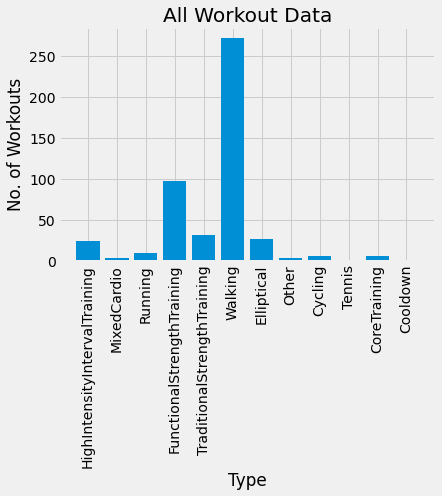

In [27]:
# Example data
labels = []
sizes = []
for wo_type in workouts.Type.unique():
        labels.append(wo_type)
        wo_of_type = workouts[workouts["Type"] == wo_type]
        num_workouts_of_type = wo_of_type.shape[0]
        sizes.append(num_workouts_of_type)


# Create bar plot
plt.bar(labels, sizes)

# Add title and labels
plt.title('All Workout Data')
plt.xlabel('Type')
plt.ylabel('No. of Workouts')

plt.xticks(rotation=90)

# Show plot
plt.show()